<a href="https://colab.research.google.com/github/jeevalakshmiv/ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Russian Rap 2017-2022 Dataset" data set.



## Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [4]:
pdata = pd.read_csv("/content/archive (5).zip")


In [5]:
pdata.shape # Check number of columns and rows in data frame

(14397, 16)

In [6]:
pdata.head() # To check first 5 rows of data set

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest,higher_guest
0,5OFMeePbu2eEX1Hyf2tzYj,044 ROSE,hit,2017-06-23,0,1.748407,0.531356,0.677570,0.595927,1.209290,1.320058,1.661759,True,1,"0,1",1
1,29kkmN00FdzizRg5xrVmBF,044 ROSE,none,2017-12-08,1,0.714910,1.291384,0.735496,0.669723,0.673321,1.021614,0.460496,True,1,1,0
2,7L1tQKY6mcy0sGXntrABgW,044 ROSE,none,2018-02-13,1,0.778734,0.574680,0.950734,0.516571,0.672520,0.746304,1.007762,False,0,NaN,0
3,4jwDiUBqLQCCuyWkbX87qN,044 ROSE,none,2018-02-13,1,1.291229,0.561352,0.688906,0.514869,1.160833,0.977034,1.069928,True,1,"1,2",1
4,2DYUk5AkUV7kPTvd58LVCw,044 ROSE,none,2018-02-13,1,0.900054,0.551893,0.600117,0.786980,0.530228,1.006494,0.458813,False,0,NaN,0


In [7]:
pdata.isnull().values.any() # If there are any null values in data set

True

In [8]:
pdata.isnull().sum()

track_id                             0
artist_name                          0
Song_Success                         0
album_release_date                   0
hit_n                                0
Drums_Energy                         0
Drums_Complexity                     0
Variety_of_musical_instruments       0
Mixing_Quality                       0
Harmonic_Richness                    0
Mixing_Character                     0
Emotional_Intensity                  0
is_feat                              0
n_feat                               0
status_guest                      8656
higher_guest                         0
dtype: int64

In [9]:
pdata.dropna(inplace=True)

In [10]:
pdata.isnull().sum()

track_id                          0
artist_name                       0
Song_Success                      0
album_release_date                0
hit_n                             0
Drums_Energy                      0
Drums_Complexity                  0
Variety_of_musical_instruments    0
Mixing_Quality                    0
Harmonic_Richness                 0
Mixing_Character                  0
Emotional_Intensity               0
is_feat                           0
n_feat                            0
status_guest                      0
higher_guest                      0
dtype: int64

In [11]:
pdata.isnull().values.any()

False

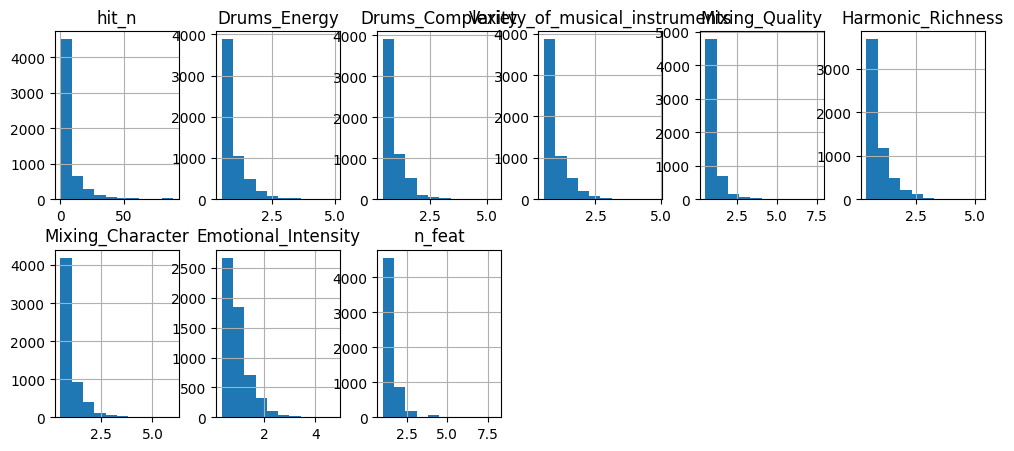

In [12]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked= True, bins=10, figsize=(12,39), layout=(14,6));
# Histogram of first 8 columns

## Identify Correlation in data

In [13]:
import pandas as pd

# Check for non-numeric values in each column
for col in pdata.columns:
    non_numeric_values = pdata[col].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values.")

Column 'track_id' contains non-numeric values.
Column 'artist_name' contains non-numeric values.
Column 'Song_Success' contains non-numeric values.
Column 'album_release_date' contains non-numeric values.
Column 'status_guest' contains non-numeric values.


In [14]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=5):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [15]:
import pandas as pd

# Check for non-numeric values in each column
for col in pdata.columns:
    non_numeric_values = pdata[col].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values.")

Column 'track_id' contains non-numeric values.
Column 'artist_name' contains non-numeric values.
Column 'Song_Success' contains non-numeric values.
Column 'album_release_date' contains non-numeric values.
Column 'status_guest' contains non-numeric values.


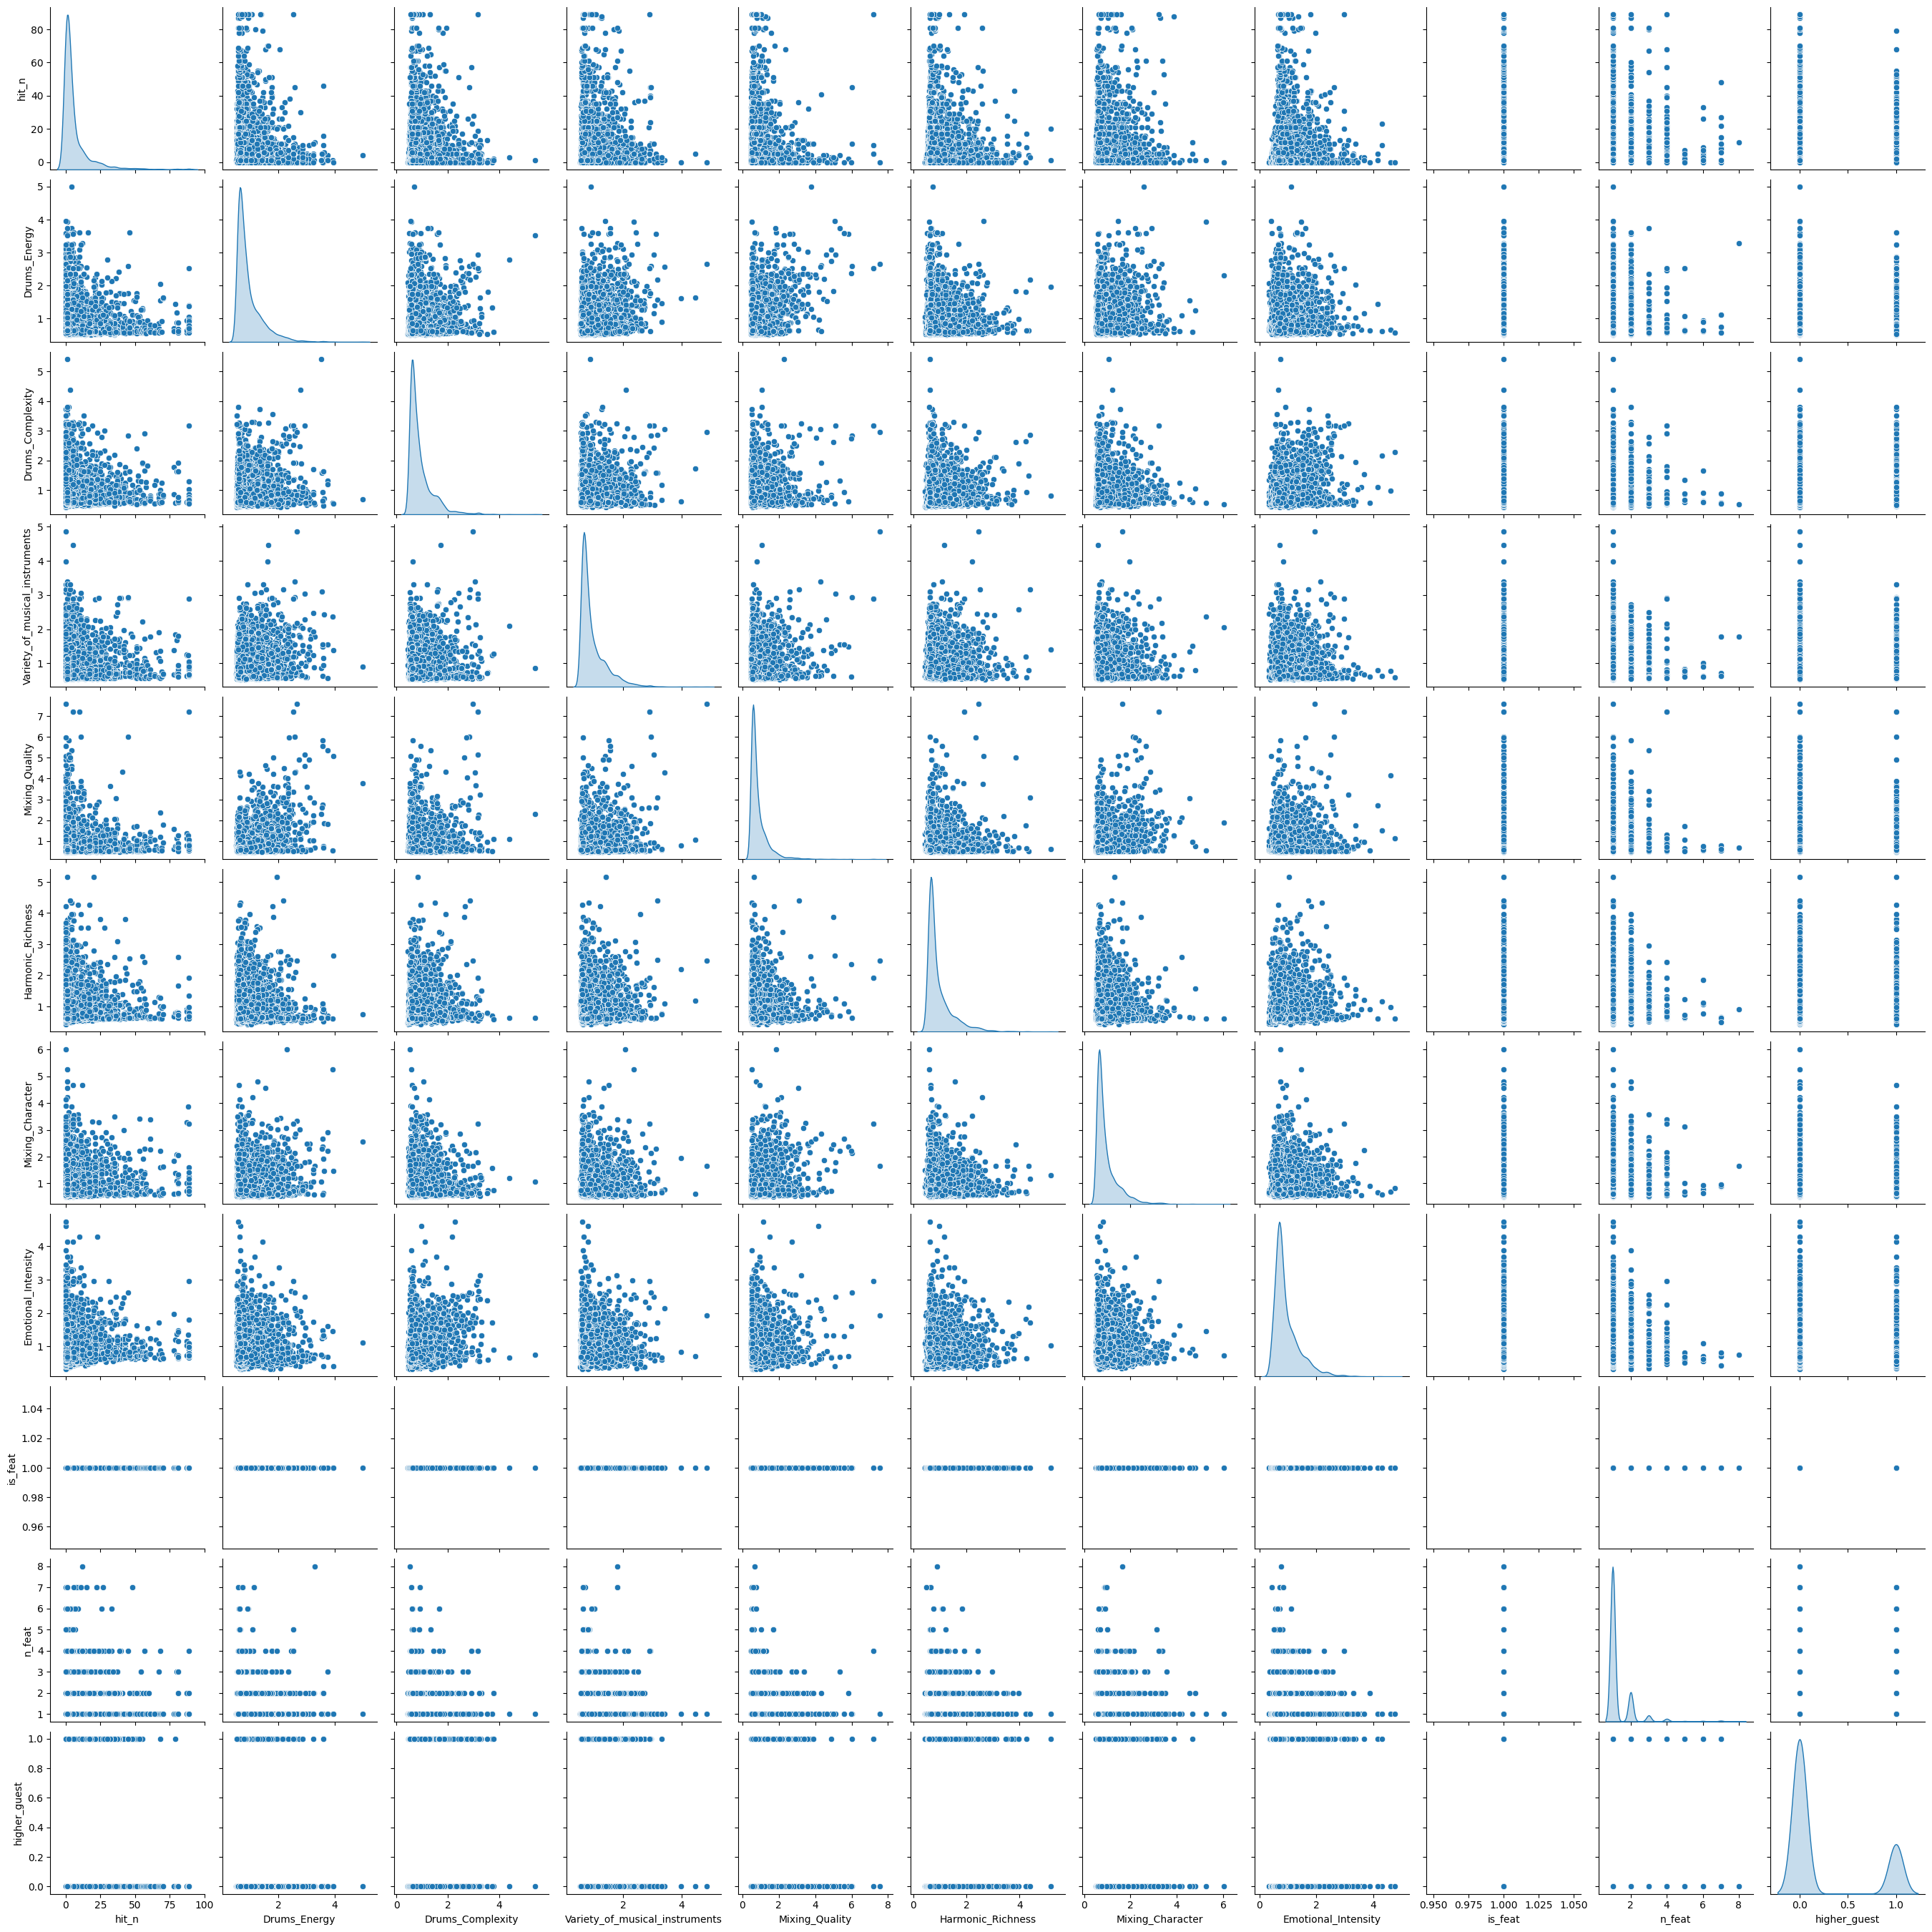

In [16]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate russian rap ratio of True/False from outcome variable

In [17]:
n_true = len(pdata.loc[pdata['higher_guest'] == True])
n_false = len(pdata.loc[pdata['higher_guest'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 1394 (24.28%)
Number of false cases: 4347 (75.72%)


## Spliting the data
We will use 80% of data for training and 20% for testing.

In [18]:
from sklearn.model_selection import train_test_split

X = pdata.drop('higher_guest',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['higher_guest']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest
7141,6uU2o1o0ksYGPYP0PEUu6x,MAYOT,hit,2021-07-23,48,0.916761,1.171866,1.003738,0.545108,0.674535,1.158553,1.046499,True,1,"0,48"
4276,6rGXoZx3EuPxug0p7icwKI,INSTASAMKA,none,2021-07-09,9,1.309540,2.474717,0.642406,0.657819,0.750663,1.006270,2.188830,True,1,"9,2"
12720,5WgOwYFd7yXNqkoOjlZHSe,Yanix,hit,2021-07-16,17,0.858623,0.677305,0.616203,0.629759,1.077753,0.597442,1.013739,True,1,"10,17"
11192,5c2jYcVpWoczYtbBuy8pmR,T1ONE,none,2019-03-12,4,0.775245,1.473242,0.950370,1.175765,0.568956,0.606160,0.859513,True,1,4
4646,563MXNowwSKySSbvPnadNr,JONY,hit,2020-04-10,13,0.561722,0.757663,0.611544,1.080531,0.770703,0.686059,1.049669,True,1,13


Lets check split of data

In [19]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

79.99% data is in training set
20.01% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [20]:
x_train.head()

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest
7141,6uU2o1o0ksYGPYP0PEUu6x,MAYOT,hit,2021-07-23,48,0.916761,1.171866,1.003738,0.545108,0.674535,1.158553,1.046499,True,1,"0,48"
4276,6rGXoZx3EuPxug0p7icwKI,INSTASAMKA,none,2021-07-09,9,1.309540,2.474717,0.642406,0.657819,0.750663,1.006270,2.188830,True,1,"9,2"
12720,5WgOwYFd7yXNqkoOjlZHSe,Yanix,hit,2021-07-16,17,0.858623,0.677305,0.616203,0.629759,1.077753,0.597442,1.013739,True,1,"10,17"
11192,5c2jYcVpWoczYtbBuy8pmR,T1ONE,none,2019-03-12,4,0.775245,1.473242,0.950370,1.175765,0.568956,0.606160,0.859513,True,1,4
4646,563MXNowwSKySSbvPnadNr,JONY,hit,2020-04-10,13,0.561722,0.757663,0.611544,1.080531,0.770703,0.686059,1.049669,True,1,13


In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4592 entries, 7141 to 12721
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        4592 non-null   object 
 1   artist_name                     4592 non-null   object 
 2   Song_Success                    4592 non-null   object 
 3   album_release_date              4592 non-null   object 
 4   hit_n                           4592 non-null   int64  
 5   Drums_Energy                    4592 non-null   float64
 6   Drums_Complexity                4592 non-null   float64
 7   Variety_of_musical_instruments  4592 non-null   float64
 8   Mixing_Quality                  4592 non-null   float64
 9   Harmonic_Richness               4592 non-null   float64
 10  Mixing_Character                4592 non-null   float64
 11  Emotional_Intensity             4592 non-null   float64
 12  is_feat                         459

We can see lots of 0 entries above.

### Replace 0s with serial mean

In [23]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# Impute missing values in numeric columns only
rep_0.fit(x_train[numeric_cols])

# Transform both training and test sets
x_train[numeric_cols] = rep_0.transform(x_train[numeric_cols])
x_test[numeric_cols] = rep_0.transform(x_test[numeric_cols])

# Logistic Regression

In [24]:
# Impute missing values in numeric columns only
numeric_cols = x_train.select_dtypes(include=[np.number]).columns
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
rep_0.fit(x_train[numeric_cols])
x_train[numeric_cols] = rep_0.transform(x_train[numeric_cols])
x_test[numeric_cols] = rep_0.transform(x_test[numeric_cols])

# Check for non-numeric columns
non_numeric_cols = x_train.select_dtypes

In [25]:
x_test = pd.get_dummies(x_test)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Identify numeric and categorical features
numeric_features = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x_train.select_dtypes(include=["object"]).columns

# Define the preprocessing steps for numeric features
numeric_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

# Define the preprocessing steps for categorical features
categorical_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehotencoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing steps for numeric and categorical features
preprocessing = ColumnTransformer([
    ("numeric", numeric_preprocessing, numeric_features),
    ("categorical", categorical_preprocessing, categorical_features)
])

# Define the model
model = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", model)
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict using the pipeline
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# Impute missing values in numeric columns only
rep_0.fit(x_train[numeric_cols])

# Transform both training and test sets
x_train[numeric_cols] = rep_0.transform(x_train[numeric_cols])
x_test[numeric_cols] = rep_0.transform(x_test[numeric_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
